# **BBC NEWS CLASSIFICATION PROJECT**

# Overview

This project looks at an unsupervised learning model technique called matrix factorization. 
Here we explore the training data using common natural language processing techniques thereby classifying different news articles into five different groups: business, tech, sport, entertainment or politics.
In here we are utilizing a publicly available dataset obtained from the BBC. This dataset consists of 2225 articles, each categorized into one of five labels: 



1. Business
2. Entertainment
3. Politics
4. Sport
5. Tech

https://github.com/mrjaiswa/Unsupervised-Learning-BBC-Classification

# Steps involved here are :

**1> Exploratory Data Analysis (EDA)**

       We need to create a dataframe comprising of classified articles (ArticleId) and which category they belong to (category). 
       We will start our EDA with an investigation of the untokenized data:

             We will look for missing data

             Plotting an histogram
             How many  articles are unique
             The article category prevelance.
             I will also be using Pandas Profiling to present the data in a very nice presentable form.
**NLP Task:**

         remove punctuation
         remove stop words (common English words such as 'to', 'the', 'of', etc.
         Tokenize the words which means splitting a string of words into a list of words. Used later on to train models
         Stemming or Lemmatize means extracting root thereby keeping the words general meaning but allowing the model to learn better.
         Once we have the data we will try to extract the outliers.

**2> Model Building and Training**

       I will be using TfidfVectorizer, CountVectorizer and TfidfTransformer.
   
**3> Model Building:**

       Here I am using NMF unsupervised model to train them and then  test data.

**4> Model Comparisons**

       After making a good working model we will compare them for their performances. 

       The reason why we are doing this is to see for a labeled set can Unsupervised learning model perform as good and Supervised one or even better?
   
**5> Conclusion**

**6> Refernces**

TF-IDF (Term Frequency-Inverse Document Frequency) is a commonly used technique in natural language processing to represent text documents as numerical vectors. It assigns weights to words based on their frequency in a document and inverse frequency across all documents in a corpus. TF-IDF is a feature extraction method that can be used as input for various machine learning models. Here are a few examples of using TF-IDF with different models:

TF-IDF + Naive Bayes:
Naive Bayes classifiers are popular for text classification tasks. TF-IDF can be used to represent text documents, and then these vectors can be fed into a Naive Bayes classifier for training and prediction.
    
TF-IDF + Support Vector Machines (SVM):
SVMs are powerful classifiers that can handle high-dimensional data. TF-IDF vectors can be used as input for an SVM classifier.

TF-IDF + Random Forest:
Random Forest is an ensemble learning algorithm that can be used for text classification. TF-IDF vectors can be used as input features for training a Random Forest classifier.

In [1]:


import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import digits

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import nltk
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download("wordnet")


import subprocess

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_88/1324280952.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /kaggle/working/corpora/wordnet.zip


replace /kaggle/working/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


**Files we are working with**

In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/learn-ai-bbc/BBC News Train.csv
/kaggle/input/learn-ai-bbc/BBC News Sample Solution.csv
/kaggle/input/learn-ai-bbc/BBC News Test.csv


# 1. Exploratory Analysis (EDA)

**Reading CSV** 
Here I have bunch of helper functions made solely for the purpose Data representation.

In [4]:
train_path = '/kaggle/input/learn-ai-bbc/BBC News Train.csv'
test_path = '/kaggle/input/learn-ai-bbc/BBC News Test.csv'
train = pd.read_csv(train_path)
print(train)




      ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  
0          business  
1          business  
2          business  
3              tech  
4          business  
...             ...  
1485 

 basic_task function is written so that we do not have to keep on writing the same code for different data frames. 
 
 It checks for the Null values, and plot the graphs 

In [7]:
def basic_task(train,set_first):
    if set_first == '1':
        print("The number of Null Values in our dataset")

        if train.isnull().values.sum() > 1:
            train.dropna(inplace=True)
        print("This is how our data looks like")



        train.describe()
        print("Number of articles that are unique")


        train.info()
        plotter(train,grah_plot='Category')
        print("Counting Word and Character Count")
        train['word count'] = train['Text'].apply(lambda row: len(row.split()))
        train['char count'] = train['Text'].apply(lambda row: len(row))
        plotter(train,grah_plot='Count')
    else:
        train['word count'] =train['Text'].apply(lambda row: len(row.split()))
        train['char count'] = train['Text'].apply(lambda row: len(row))
        plotter(train,grah_plot='Count')

In [8]:
def plotter(train,grah_plot):
    if grah_plot == 'Count':

        
        fig, ax = plt.subplots(figsize=(15, 5))
        sns.histplot(
            data = train, 
            x = 'word count',
            palette = 'colorblind',
            ).set(
                title = 'Number of Words per Article');
        
        fig, ax = plt.subplots(figsize=(15, 5))
        sns.boxplot(
            data = train, 
            x = 'word count', 
            y = 'Category',
            palette = 'colorblind'
            ).set(
                title = 'Number of Words Per Category');

        
    elif grah_plot == 'Category':
        

        train['Category'].value_counts()[train['Category'].unique()].plot.barh(stacked=True)

The number of Null Values in our dataset
This is how our data looks like
Number of articles that are unique
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
Counting Word and Character Count


/tmp/ipykernel_88/1055700631.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


      ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  word count  char count  
0          business         301        1866  
1          business         325        2016  
2          business  

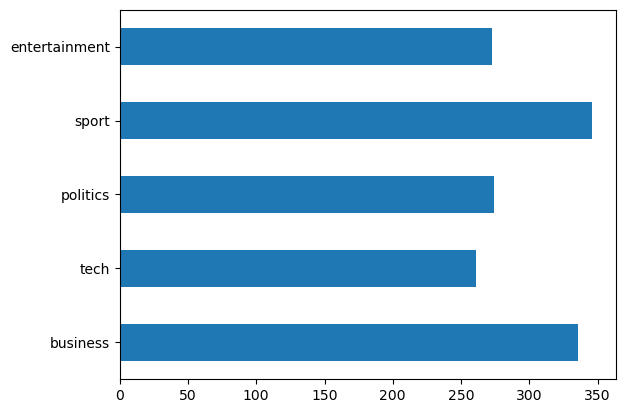

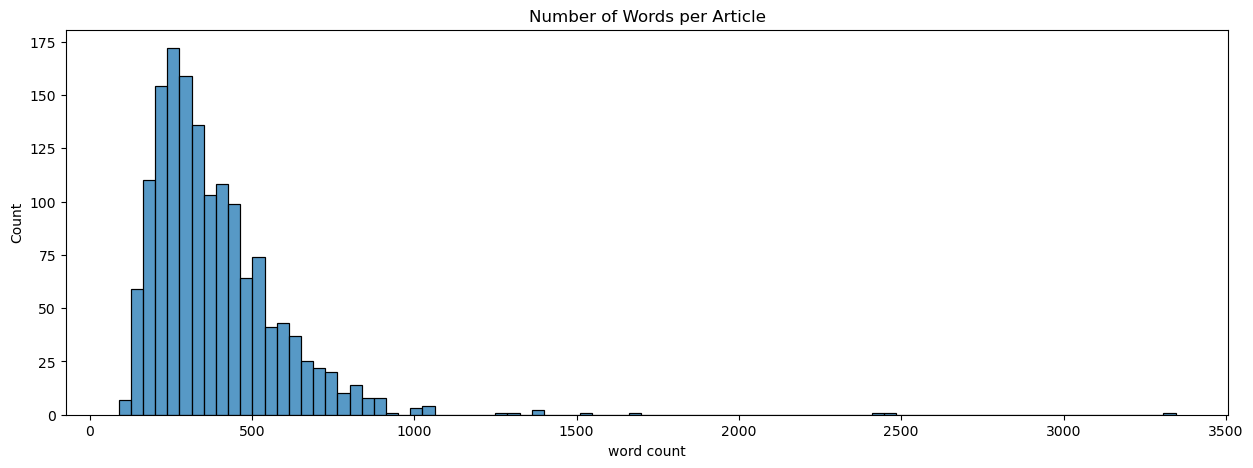

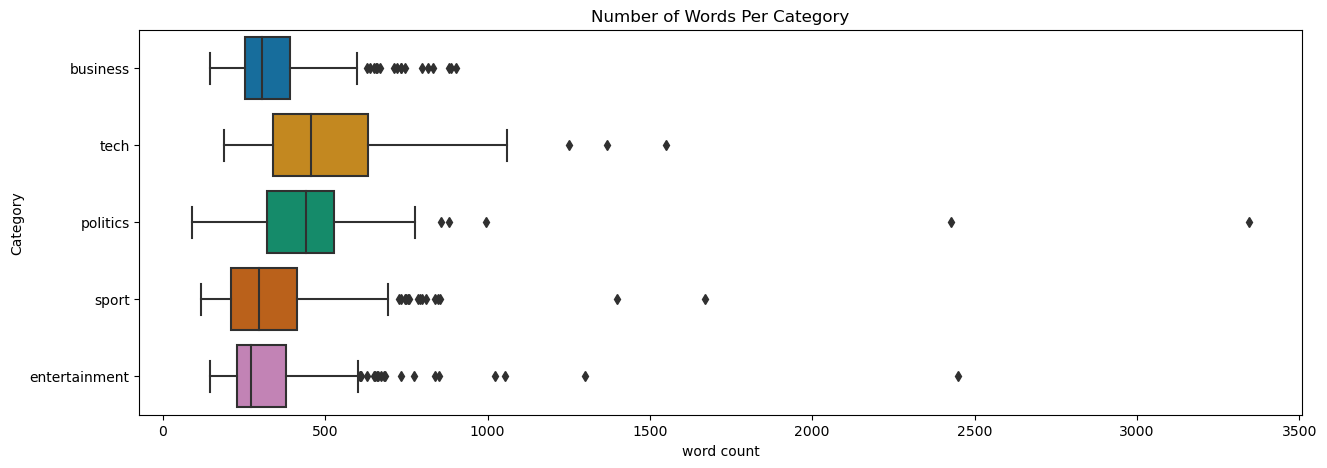

In [9]:
basic_task(train,set_first='1')
print(train)

Here I am doing 2 things:


   Cleaning the text 
    
   Generating profile of the data Frame. 
    
  Profiler actually represents the dataframe beautifully  with all the bells and whistles.

In [11]:
def plotter(train,grah_plot):
    if grah_plot == 'Count':

        
        fig, ax = plt.subplots(figsize=(15, 5))
        sns.histplot(
            data = train, 
            x = 'word count',
            palette = 'colorblind',
            ).set(
                title = 'Number of Words per Article');
        
        fig, ax = plt.subplots(figsize=(15, 5))
        sns.boxplot(
            data = train, 
            x = 'word count', 
            y = 'Category',
            palette = 'colorblind'
            ).set(
                title = 'Number of Words Per Category');

        
    elif grah_plot == 'Category':
        

        train['Category'].value_counts()[train['Category'].unique()].plot.barh(stacked=True)

def clean_text(train):


    stop_words = stopwords.words('english')
    train['Text'] = train['Text'].apply(lambda row: re.sub(r'[^\w\s]+', '', row))
    train['Text'] = train['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    train['Text'] = train['Text'].apply(lambda x: re.sub(' +', ' ', x))
    train['Text'] = train['Text'].apply(lambda row: re.sub(r'[0-9]+', '', row))
    

def profiler(train):

    
    profile = pp.ProfileReport(train, title="Pandas Profiling Report", explorative=True)
    profile.to_notebook_iframe()
    profile.to_file("first_profile.html")
    print("Generating Data Frame Profile")

def basic_task(train,set_first):
    if set_first == '1':
        print("The number of Null Values in our dataset")

        if train.isnull().values.sum() > 1:
            train.dropna(inplace=True)
        print("This is how our data looks like")



        train.describe()
        print("Number of articles that are unique")


        train.info()
        plotter(train,grah_plot='Category')
        print("Counting Word and Character Count")
        train['word count'] = train['Text'].apply(lambda row: len(row.split()))
        train['char count'] = train['Text'].apply(lambda row: len(row))
        plotter(train,grah_plot='Count')
    else:
        train['word count'] =train['Text'].apply(lambda row: len(row.split()))
        train['char count'] = train['Text'].apply(lambda row: len(row))
        plotter(train,grah_plot='Count')
    
    
#     plotter(train)



print("Cleaning Data removing Stop words, punctuations")
clean_text(train)
print('*' * 90)
basic_task(train,set_first='2')
print(train)

profiler(train)

Cleaning Data removing Stop words, punctuations
******************************************************************************************


/tmp/ipykernel_88/2233751693.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


      ArticleId                                               Text  \
0          1833  worldcom exboss launches defence lawyers defen...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens maj...   
3          1976  lifestyle governs mobile choice faster better ...   
4           917  enron bosses payout eighteen former enron dire...   
...         ...                                                ...   
1485        857  double eviction big brother model caprice holb...   
1486        325  dj double act revamp chart show dj duo jk joel...   
1487       1590  weak dollar hits reuters revenues media group ...   
1488       1587  apple ipod family expands market apple expande...   
1489        538  santy worm makes unwelcome visit thousands web...   

           Category  word count  char count  
0          business         185        1388  
1          business         194        1474  
2          business  

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Generating Data Frame Profile


In [12]:

lemmatizer = WordNetLemmatizer()

def lemmatizer_text(text):

    print(text)
    lem = [lemmatizer.lemmatize( text)] 
    return lem

train['tokenized'] = train.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)


train.head()

,ArticleId,Text,Category,word count,char count,tokenized
0,1833,worldcom exboss launches defence lawyers defen...,business,185,1388,"[worldcom, exboss, launches, defence, lawyers,..."
1,154,german business confidence slides german busin...,business,194,1474,"[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens maj...,business,267,2061,"[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster better ...,tech,344,2381,"[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses payout eighteen former enron dire...,business,198,1517,"[enron, bosses, payout, eighteen, former, enro..."


Here I see that my manual removal of puncutations and other spaces result in the same number of words when I use nltk.word_tokenize.

# Splitting the Training and Testing Sets so that I can feed this to my model:

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(train['Text'], train['Category'], test_size=0.33, random_state=42)


In [14]:
y_train.head(10)
# X_valid.head()

438     entertainment
500          business
636     entertainment
96           business
578     entertainment
1206             tech
1259         politics
419          business
410          business
1320             tech
Name: Category, dtype: object


#  Model Building with NMF

Here the task is to convert raw texts to feature vectors by  a method called as TF-IDF.

Brief explaination of what is TF-IDF:




TF-IDF (Term Frequency-Inverse Document Frequency) is an algorithm that uses the frequency of words to determine how relevant those words are to a given document. It's a relatively simple but intuitive approach to weighting words, allowing it to act as a great jumping off point for a variety of tasks

The first part of the product, Term Frequency, measures the frequency of a term within a document relative to the total number of words in that document. Therefore, a higher TF value means that a term is more important or relevant within the specific document..

IDF quantifies the importance of a term by considering how frequently it appears across all documents in the collection. Terms that are rare or occur in only a few documents receive higher IDF values. This is a really important concept since this prevents us from classifying words as important that only have a high TF value.

For example, a common english word like 'the' might have a high TF value since it appears quite often in a certain document. But since it probably also appears in all other documents this word is not likely to have a high relevance when it comes to deciding what the article is about. 



# Creating the Vectorized training Data

In [15]:
def tfidf_vectorization(X_train, X_valid):
    tfidvector = TfidfVectorizer(min_df = 2,
                              max_df = 0.95,
                              norm = 'l2',
                              stop_words = 'english',
                              lowercase = True)
    tfidvector_train = tfidvector.fit_transform(X_train)
    tfidfvector_valid = tfidvector.transform(X_valid)
    
    return tfidvector_train, tfidfvector_valid
    

    
tfidfvector_train, tfidfvector_valid = tfidf_vectorization(X_train, X_valid)

#create model


In [16]:
def predict(matrix):
    sortedMatrix = np.argsort(matrix)
    n_predictions, maxValue = sortedMatrix.shape
    
    predictions = [[sortedMatrix[i][maxValue - 1]] for i in range(n_predictions)]
    topics = np.empty(n_predictions, dtype = np.int64)
    
    for i in range(n_predictions):
        topics[i] = predictions[i][0]
    return topics

def label_permute(ytdf,yp,perm_list, n=5):

    # your code here
    unique = np.unique(ytdf)
    perm = itertools.permutations(perm_list)
    accuracyMatrix = []
    for i in list(perm):
        j = 0
        ytdf_guess = ytdf
        for k in unique:
            ytdf_guess = np.where(ytdf_guess == k, i[j], ytdf_guess)
            j+=1
        pred = ytdf_guess.tolist()

        accuracy = accuracy_score(pred,yp)
        accuracyMatrix.append((i,accuracy))
    i = 0
    maxAccuracy = 0
    while i < len(accuracyMatrix):
        if accuracyMatrix[i][1] > maxAccuracy:
            maxtuple = accuracyMatrix[i]
            maxAccuracy = accuracyMatrix[i][1]
        i += 1
    
    print(maxtuple)
    return maxtuple


In [17]:
def model(mtype, stype):
    nmf = NMF(
        init = 'nndsvdar',
        n_components=5,
        solver = stype,
        random_state=1,
        beta_loss=mtype,
        alpha_W=0.00005,
        alpha_H=0.00005,
        l1_ratio=.1,
    )
    return nmf

In [18]:

labels = [0,1,2,3,4]
m = model("frobenius", "cd").fit(tfidfvector_train)
print(f'trying with {m}')
yhat = predict(m.transform(tfidfvector_valid))
label_order, accuracy = label_permute(y_valid, yhat,labels)
print(label_order)
print(accuracy)


trying with NMF(alpha_H=5e-05, alpha_W=5e-05, init='nndsvdar', l1_ratio=0.1, n_components=5,
    random_state=1)
((4, 3, 1, 0, 2), 0.9146341463414634)
(4, 3, 1, 0, 2)
0.9146341463414634


# Trying different beta loss

This is Hyperparameter Tuning

From reading articles written by far intelligent folks than me I found that 'mu' is a good solver for the NMF. 


As you can see that the top model had solver 'cd', now for this I am changing that to 'mu' and let's see:

In [19]:
labels = [0,1,2,3,4]
m = model("kullback-leibler", "mu").fit(tfidfvector_train)
print(f'trying with {m}')
yhat = predict(m.transform(tfidfvector_valid))
label_order, accuracy = label_permute(y_valid, yhat,labels)
print(label_order)
print(accuracy)

trying with NMF(alpha_H=5e-05, alpha_W=5e-05, beta_loss='kullback-leibler', init='nndsvdar',
    l1_ratio=0.1, n_components=5, random_state=1, solver='mu')
((4, 3, 1, 0, 2), 0.9654471544715447)
(4, 3, 1, 0, 2)
0.9654471544715447


In [ ]:
Top part shows that it improved to 97%

# Reading Test Data:

In [20]:
test = pd.read_csv(test_path)

In [21]:
test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


Cleaning the test text

In [22]:
clean_text(test)
print('*' * 90)
print(test.head())

******************************************************************************************
   ArticleId                                               Text
0       1018  qpr keeper day heads preston queens park range...
1       1319  software watching work software monitor every ...
2       1138  arcy injury adds ireland woe gordon arcy ruled...
3        459  india reliance family feud heats ongoing publi...
4       1020  boro suffer morrison injury blow middlesbrough...


Vectorize the component

In [25]:
tfidvec_test = TfidfVectorizer(min_df = 2,max_df = 0.95,norm = 'l2',stop_words = 'english')

In [27]:
test['Text']

0      qpr keeper day heads preston queens park range...
1      software watching work software monitor every ...
2      arcy injury adds ireland woe gordon arcy ruled...
3      india reliance family feud heats ongoing publi...
4      boro suffer morrison injury blow middlesbrough...
                             ...                        
730    eu probe alitalia state aid european commissio...
731    u play grammy awards show irish rock band u pl...
732    sport betting rules spotlight group mps peers ...
733    alfa romeos get gm engines fiat stop making si...
734    citizenship event s touted citizenship ceremon...
Name: Text, Length: 735, dtype: object

In [28]:
tfidvec_test = tfidvec_test.fit_transform(test['Text'])

In [29]:
tfidvec_test

<735x9559 sparse matrix of type '<class 'numpy.float64'>'
	with 93908 stored elements in Compressed Sparse Row format>

In [32]:
m = model("frobenius", "cd").fit(tfidvec_test)
yhat_test = predict(m.transform(tfidvec_test))

In [34]:
yhat_test

array([0, 3, 0, 2, 0, 0, 1, 1, 4, 2, 2, 3, 1, 3, 4, 0, 1, 3, 4, 4, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 2, 1, 3, 2, 2, 0, 0, 0, 2, 4, 3, 1, 1, 4, 3,
       0, 3, 4, 2, 1, 2, 1, 2, 1, 2, 3, 1, 3, 4, 0, 3, 0, 4, 3, 1, 2, 4,
       0, 3, 0, 0, 3, 0, 2, 1, 3, 0, 3, 4, 3, 4, 1, 0, 4, 0, 2, 4, 2, 4,
       2, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 2, 0, 1, 0, 1, 4,
       0, 2, 4, 0, 1, 0, 1, 0, 1, 2, 2, 2, 4, 3, 3, 0, 2, 4, 2, 0, 2, 1,
       1, 3, 2, 2, 1, 3, 4, 0, 2, 3, 0, 4, 0, 0, 0, 4, 4, 3, 2, 3, 1, 4,
       0, 0, 0, 0, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 1, 2, 1, 2, 2, 4, 1,
       3, 2, 2, 3, 0, 1, 4, 1, 3, 3, 1, 2, 1, 3, 1, 2, 4, 0, 3, 3, 2, 3,
       1, 2, 0, 1, 2, 4, 2, 2, 0, 3, 2, 0, 4, 4, 0, 4, 0, 3, 1, 4, 0, 4,
       0, 4, 1, 2, 3, 3, 2, 1, 2, 3, 2, 0, 1, 1, 2, 1, 0, 2, 4, 1, 0, 0,
       2, 0, 3, 2, 1, 2, 1, 2, 2, 0, 3, 1, 4, 3, 4, 3, 0, 0, 3, 0, 0, 0,
       4, 0, 1, 3, 2, 0, 2, 0, 2, 0, 4, 2, 2, 4, 1, 2, 0, 0, 3, 0, 0, 4,
       2, 0, 3, 1, 4, 2, 2, 1, 0, 4, 1, 2, 0, 0, 3,

In [49]:
label_dict = {4:'business', 1:'tech', 2:'politics', 0:'sport', 3:'entertainment'}

solution = pd.DataFrame(columns=['ArticleId', 'Category','tag'])
solution['ArticleId'] = test['ArticleId']
solution['tag'] = yhat_test
solution['Category'] = solution['tag'].apply(lambda i: label_dict[i])

solution.head()

,ArticleId,Category,tag
0,1018,sport,0
1,1319,entertainment,3
2,1138,sport,0
3,459,politics,2
4,1020,sport,0


# Submitting Results:

In [50]:
try: 
    solution.to_csv('submission.csv', index=False)
except: 
    pass

#  Model Comparisons

For this project, I used  unsupervised learning to classify text articles using a matrix factorization model. The ask now is to use a supervised models which would perform better with this type of data if we have pre-labeled text. 

Hence, we will compare my unsupervised learning model  to a supervised model below. 

Here I will try 2 since I want to see which one will behave best:

1> Naive Bayes

2> SVM (linear SVC)

https://ml-course.github.io/master/labs/Lab%204%20-%20Tutorial

In [38]:
y_train = train['Category'].values
X_train = train['Text'].values
target_category = train['Category'].unique()

# Using the same Data as used in training the Unsupervised Model

In [ ]:
# tfidvector_train 
# tfidfvector_valid 
# tfidvec_test

In [41]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

test_predict = nb.predict(X_valid)

train_accuracy = round(nb.score(X_train,y_train)*100)
test_accuracy =round(accuracy_score(test_predict, y_valid)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, y_valid, target_names=target_category))

Naive Bayes Train Accuracy Score : 99% 
Naive Bayes Test Accuracy Score  : 100% 

               precision    recall  f1-score   support

     business       1.00      1.00      1.00       117
         tech       1.00      1.00      1.00        88
     politics       1.00      1.00      1.00        93
        sport       1.00      1.00      1.00       110
entertainment       1.00      1.00      1.00        84

     accuracy                           1.00       492
    macro avg       1.00      1.00      1.00       492
 weighted avg       1.00      1.00      1.00       492



In [44]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train_supervised,Y_train_supervised)

test_predict = nb.predict(X_test_supervised)

train_accuracy = round(nb.score(X_train_supervised,Y_train_supervised)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test_supervised)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test_supervised, target_names=target_category))


Naive Bayes Train Accuracy Score : 99% 
Naive Bayes Test Accuracy Score  : 97% 

               precision    recall  f1-score   support

     business       0.96      0.96      0.96        93
         tech       0.95      1.00      0.97        76
     politics       0.96      0.93      0.95        86
        sport       1.00      0.98      0.99       109
entertainment       0.98      0.99      0.98        83

     accuracy                           0.97       447
    macro avg       0.97      0.97      0.97       447
 weighted avg       0.97      0.97      0.97       447



In [46]:
from sklearn.svm import LinearSVC

# Creating New Set for checking Data wrangling 

In [ ]:
X_train_supervised, X_test_supervised, Y_train_supervised, Y_test_supervised = train_test_split(X_train,y_train, test_size = 0.3, random_state = 60,shuffle=True)

In [47]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('SVM',  LinearSVC()),
              ])
nb.fit(X_train_supervised,Y_train_supervised)

test_predict = nb.predict(X_test_supervised)

train_accuracy = round(nb.score(X_train_supervised,Y_train_supervised)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test_supervised)*100)


print("SVM Train Accuracy Score : {}% ".format(train_accuracy ))
print("SVM Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test_supervised, target_names=target_category))

SVM Train Accuracy Score : 100% 
SVM Test Accuracy Score  : 98% 

               precision    recall  f1-score   support

     business       0.95      0.96      0.95        92
         tech       0.97      1.00      0.99        78
     politics       0.98      0.95      0.96        85
        sport       1.00      1.00      1.00       107
entertainment       1.00      0.99      0.99        85

     accuracy                           0.98       447
    macro avg       0.98      0.98      0.98       447
 weighted avg       0.98      0.98      0.98       447




#  Conclusion

Let's summarize our test results :

   
1> We first cleaned the training data in common NLP preprocessing ways and explored the data. 
2> Then we created a matrix factorization model and got a testing accuracy of 97%. We got this score by fine-tuning some parameters and using the training accuracy as a guide. 
The unsupervised model did quite well but not as good as  to the supervised learning model. 





# **References**

https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3


https://www.analyticsvidhya.com/blog/2021/09/creating-a-movie-reviews-classifier-using-tf-idf-in-python/


https://arxiv.org/ftp/arxiv/papers/1806/1806.06407.pdf

                                                                                                              Mrinal Jaiswal